In [1]:
# Welcome to InnoVest!

print(f'Enjoy reviewing our InnoVest mainframe code!')

Enjoy reviewing our InnoVest mainframe code!


In [2]:
# Setting the story...

# Some investors profit by finding stocks that are overvalued or undervalued based on market sentiment. 

# They use various indicators to measure market sentiment that help determine the best stocks to trade. 

# Popular sentiment indicators include the Internet Search Activity, Bullish Percent Index (BPI) and moving averages.

In [3]:
# Imports & Engines

import pandas as pd
import hvplot.pandas
from pathlib import Path
import os
import requests
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Load .env environment to ensure all systems go!
load_dotenv()

True

In [5]:
#Set Alpaca API key and secret

alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

#Create Alpaca API object

alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="V2")

In [6]:
# Format start and end dates as ISO format for One Year period

start = pd.Timestamp("2022-08-02", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-08-02", tz="America/New_York").isoformat()

# Configure Data Parameters

tickers = ['SPY', 'TSLA', 'LCID', 'F', 'META', 'RBLX', 'AAPL', 'GOOG', 'MSFT', 'NVDA']

# Adjusting Timeframe to 1Week instead of 1Day due to Google Trends Data Output

timeframe = "1Week"

# Get closing price market data for specitfically identified 'innovative' stocks, for last year

portfolio_year_df = alpaca_api.get_bars(tickers, timeframe, start=start, end=end).df

# Clean up data to have information we need and interested in

portfolio_year_df.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)

# Show dataframe of closing prices

portfolio_year_df

,close,symbol
timestamp,,
2022-08-08 04:00:00+00:00,172.10,AAPL
2022-08-15 04:00:00+00:00,171.52,AAPL
2022-08-22 04:00:00+00:00,163.62,AAPL
2022-08-29 04:00:00+00:00,155.81,AAPL
2022-09-05 04:00:00+00:00,157.37,AAPL
...,...,...
2023-07-03 04:00:00+00:00,274.43,TSLA
2023-07-10 04:00:00+00:00,281.40,TSLA
2023-07-17 04:00:00+00:00,260.02,TSLA


In [7]:
# Separate Specific Ticker Information from Dataframe

spy_data = portfolio_year_df[portfolio_year_df['symbol'] == 'SPY']
tsla_data = portfolio_year_df[portfolio_year_df['symbol'] == 'TSLA']
lcid_data = portfolio_year_df[portfolio_year_df['symbol'] == 'LCID']
f_data = portfolio_year_df[portfolio_year_df['symbol'] == 'F']
meta_data = portfolio_year_df[portfolio_year_df['symbol'] == 'META']
rblx_data = portfolio_year_df[portfolio_year_df['symbol'] == 'RBLX']
aapl_data = portfolio_year_df[portfolio_year_df['symbol'] == 'AAPL']
goog_data = portfolio_year_df[portfolio_year_df['symbol'] == 'GOOG']
msft_data = portfolio_year_df[portfolio_year_df['symbol'] == 'MSFT']
nvda_data = portfolio_year_df[portfolio_year_df['symbol'] == 'NVDA']

In [8]:
# Ensure Clean Separate Ticker Data

meta_data.tail()

,close,symbol
timestamp,,
2023-07-03 04:00:00+00:00,290.53,META
2023-07-10 04:00:00+00:00,308.87,META
2023-07-17 04:00:00+00:00,294.26,META
2023-07-24 04:00:00+00:00,325.48,META
2023-07-31 04:00:00+00:00,310.73,META


In [9]:
# Choose specific Stock Close (Pricing) information column and get Daily Returns

spy_daily_returns = spy_data['close'].pct_change()
tsla_daily_returns = tsla_data['close'].pct_change()
lcid_daily_returns = lcid_data['close'].pct_change()
f_daily_returns = f_data['close'].pct_change()
meta_daily_returns = meta_data['close'].pct_change()
rblx_daily_returns = rblx_data['close'].pct_change()
aapl_daily_returns = aapl_data['close'].pct_change()
goog_daily_returns = goog_data['close'].pct_change()
msft_daily_returns = msft_data['close'].pct_change()
nvda_daily_returns = nvda_data['close'].pct_change()

In [10]:
# Ensure Clean Separate Stock Daily Returns

f_daily_returns.head()

timestamp
2022-08-08 04:00:00+00:00         NaN
2022-08-15 04:00:00+00:00   -0.018541
2022-08-22 04:00:00+00:00   -0.029597
2022-08-29 04:00:00+00:00   -0.016223
2022-09-05 04:00:00+00:00    0.017150
Name: close, dtype: float64

In [11]:
# Combined Daily Returns into Dataframe with all Stocks

combined_dly_rtn = pd.concat([spy_daily_returns, tsla_daily_returns, lcid_daily_returns, f_daily_returns, meta_daily_returns, rblx_daily_returns, aapl_daily_returns, goog_daily_returns, msft_daily_returns, nvda_daily_returns], axis="columns", join="inner")

# Remame Columns in newly created concatenated Daily Returns DataFrame

combined_dly_rtn.columns = ["SPY", "TSLA", "LCID", "F", "META", "RBLX", "AAPL", "GOOG", "MSFT", "NVDA"]

# Show cleaned up, individual stock Daily Returns together

combined_dly_rtn.head()

,SPY,TSLA,LCID,F,META,RBLX,AAPL,GOOG,MSFT,NVDA
timestamp,,,,,,,,,,
2022-08-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-15 04:00:00+00:00,-0.011613,-0.011210,-0.102358,-0.018541,-0.069474,-0.165591,-0.003370,-0.036934,-0.019732,-0.045967
2022-08-22 04:00:00+00:00,-0.039868,-0.676303,-0.030448,-0.029597,-0.036794,-0.073102,-0.046059,-0.057738,-0.063114,-0.089025
2022-08-29 04:00:00+00:00,-0.032247,-0.062064,-0.066502,-0.016223,-0.009025,-0.040950,-0.047733,-0.023540,-0.044873,-0.160701
2022-09-05 04:00:00+00:00,0.036610,0.109063,-0.005277,0.017150,0.055077,0.200053,0.010012,0.028524,0.032805,0.054224


In [12]:
# Set up to show info for corresponding stocks and group them by sectors in Cells 

In [13]:
# Electric Vehicles

print('Here are the best EV stocks risk indicators:')
print('')

# TSLA 

print(f'This is the information for TSLA:')
print('')
tsla_covariance = combined_dly_rtn['TSLA'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {tsla_covariance}.')

tsla_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {tsla_variance}.')

tsla_beta = tsla_covariance / tsla_variance
print(f'The beta for $TSLA is {tsla_beta}.')

print('')
# 'LCID'

print(f'This is the information for LCID:')
print('')

lcid_covariance = combined_dly_rtn['LCID'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {lcid_covariance}.')

lcid_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {lcid_variance}.')

lcid_beta = lcid_covariance / lcid_variance
print(f'The beta for $LCID is {lcid_beta}.')
print('')

# 'F'

print(f'This is the information for F:')
print('')

f_covariance = combined_dly_rtn['F'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {f_covariance}.')

f_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {f_variance}.')

f_beta = f_covariance / f_variance
print(f'The beta for $F is {f_beta}.')
print('')

Here are the best EV stocks risk indicators:

This is the information for TSLA:

The covariance is 0.0015573947721996557.
The variance is 0.0006134141373193083.
The beta for $TSLA is 2.5388961183804035.

This is the information for LCID:

The covariance is 0.001283305469815276.
The variance is 0.0006134141373193083.
The beta for $LCID is 2.0920702535867064.

This is the information for F:

The covariance is 0.0009744966496654645.
The variance is 0.0006134141373193083.
The beta for $F is 1.588643936255087.



In [14]:
# Metaverse

print('Here are the best Metaverse stocks risk indicators:')
print('')

# 'META'

print(f'This is the information for META:')
print('')

meta_covariance = combined_dly_rtn['META'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {meta_covariance}.')

meta_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {meta_variance}.')

meta_beta = meta_covariance / meta_variance
print(f'The beta for $META is {meta_beta}.')
print('')

# 'RBLX'

print(f'This is the information for RBLX:')
print('')

rblx_covariance = combined_dly_rtn['RBLX'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {rblx_covariance}.')

rblx_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {rblx_variance}.')

rblx_beta = rblx_covariance / rblx_variance
print(f'The beta for $RBLX is {rblx_beta}.')
print('')

# 'AAPL'

print(f'This is the information for AAPL:')
print('')

aapl_covariance = combined_dly_rtn['AAPL'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {aapl_covariance}.')

aapl_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {aapl_variance}.')

aapl_beta = aapl_covariance / aapl_variance
print(f'The beta for $AAPL is {aapl_beta}.')
print('')

Here are the best Metaverse stocks risk indicators:

This is the information for META:

The covariance is 0.0009663386700967113.
The variance is 0.0006134141373193083.
The beta for $META is 1.575344634735229.

This is the information for RBLX:

The covariance is 0.0012184667409831475.
The variance is 0.0006134141373193083.
The beta for $RBLX is 1.9863688605352168.

This is the information for AAPL:

The covariance is 0.000734357158863983.
The variance is 0.0006134141373193083.
The beta for $AAPL is 1.1971637335800733.



In [15]:
# Artificial Intelligence Stocks

print('Here are the best Artificial Intelligence stocks risk indicators:')
print('')

# 'GOOG'

print(f'This is the information for GOOG:')
print('')

goog_covariance = combined_dly_rtn['GOOG'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {goog_covariance}.')

goog_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {goog_variance}.')

goog_beta = goog_covariance / goog_variance
print(f'The beta for $GOOG is {goog_beta}.')
print('')

# 'MSFT'
print(f'This is the information for MSFT:')
print('')

msft_covariance = combined_dly_rtn['MSFT'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {msft_covariance}.')

msft_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {msft_variance}.')

msft_beta = msft_covariance / msft_variance
print(f'The beta for $MSFT is {msft_beta}.')
print('')

# 'NVDA'

print(f'This is the information for NVDA:')
print('')

nvda_covariance = combined_dly_rtn['NVDA'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {nvda_covariance}.')

nvda_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {nvda_variance}.')

nvda_beta = nvda_covariance / nvda_variance
print(f'The beta for $NVDA is {nvda_beta}.')
print('')

Here are the best Artificial Intelligence stocks risk indicators:

This is the information for GOOG:

The covariance is 0.0007473466127872078.
The variance is 0.0006134141373193083.
The beta for $GOOG is 1.2183394012619273.

This is the information for MSFT:

The covariance is 0.0007066380186872674.
The variance is 0.0006134141373193083.
The beta for $MSFT is 1.1519754366525663.

This is the information for NVDA:

The covariance is 0.0011432417367334658.
The variance is 0.0006134141373193083.
The beta for $NVDA is 1.86373555348686.



In [16]:
# Isolate specific stocks to show Daily Returns for that particular innovative sector in future recommended portfolio

ev_port_daily = combined_dly_rtn.iloc[:,1:4]
meta_port_daily = combined_dly_rtn.iloc[:,4:7]
ai_port_daily = combined_dly_rtn.iloc[:,6:9]

In [17]:
# Does it work?

ai_port_daily.head()

,AAPL,GOOG,MSFT
timestamp,,,
2022-08-08 04:00:00+00:00,NaN,NaN,NaN
2022-08-15 04:00:00+00:00,-0.003370,-0.036934,-0.019732
2022-08-22 04:00:00+00:00,-0.046059,-0.057738,-0.063114
2022-08-29 04:00:00+00:00,-0.047733,-0.023540,-0.044873
2022-09-05 04:00:00+00:00,0.010012,0.028524,0.032805


In [18]:
# Write Code showing Annualized Standard Deviation

daily_std = combined_dly_rtn.std()

# Identify the stock with the most risk

daily_std = combined_dly_rtn.std().sort_values(ascending=False)

# Calculate the annualized standard deviation (52 weeks for each week of data)

annualized_std = daily_std * np.sqrt(52)

# What's the story here?

print('')
print(f'Standard deviation is useful for measuring the absolute risk of an asset or a portfolio, regardless of the market or benchmark.') 
print('')
print(f'It helps investors to assess the potential range of outcomes and the probability of achieving a certain return.')
print('')

annualized_std.hvplot.bar(xlabel='Stock Ticker $', ylabel='Annualized Standard Deviation', title='Risk Premium on your Future Bet')


Standard deviation is useful for measuring the absolute risk of an asset or a portfolio, regardless of the market or benchmark.

It helps investors to assess the potential range of outcomes and the probability of achieving a certain return.



:Bars   [index]   (0)

In [19]:
# Compute annualized volatility for all stocks

volatility = combined_dly_rtn.std() * np.sqrt(52)

# Equal Distribution of Stock Concentration 
# Will configure stock to later show to show potential returns, with specific initial dollar ivestment amount, based on your risk tolerance

initial_investment = 10000
weight = [.1, .1, .1, .1, .1, .1, .1, .1, .1, .1]

portfolio_returns = combined_dly_rtn.dot(weight)

cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).hvplot(xlabel='A Year Ago Today', ylabel='Portfolio Valuation in $USD', title='Equal Weighted Portfolio')

:Curve   [timestamp]   (0)

In [20]:
# Things Noticed:

# Lucid has more Beta than Starndard Deviation: Carries more upside, at not worth it volatility"
# META has more 

In [21]:
# New Library or Tools to be used here - Alexis working on this (PyFolio)

# Import NEW libraries

# Make sure you download required libs and resources by using 'pip install pyfolio-reloaded' in your Terminal/Command Prompt/Anaconda Prompt

import pyfolio as pf

/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


[*********************100%***********************]  1 of 1 completed


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,73.63,2021-11-04,2023-01-03,NaT,NaN
1,60.63,2020-02-19,2020-03-18,2020-06-08,79
2,53.51,2017-09-18,2019-06-03,2019-12-18,588
3,49.77,2014-09-04,2016-02-10,2017-04-03,673
4,38.46,2010-11-24,2011-02-23,2012-03-12,339


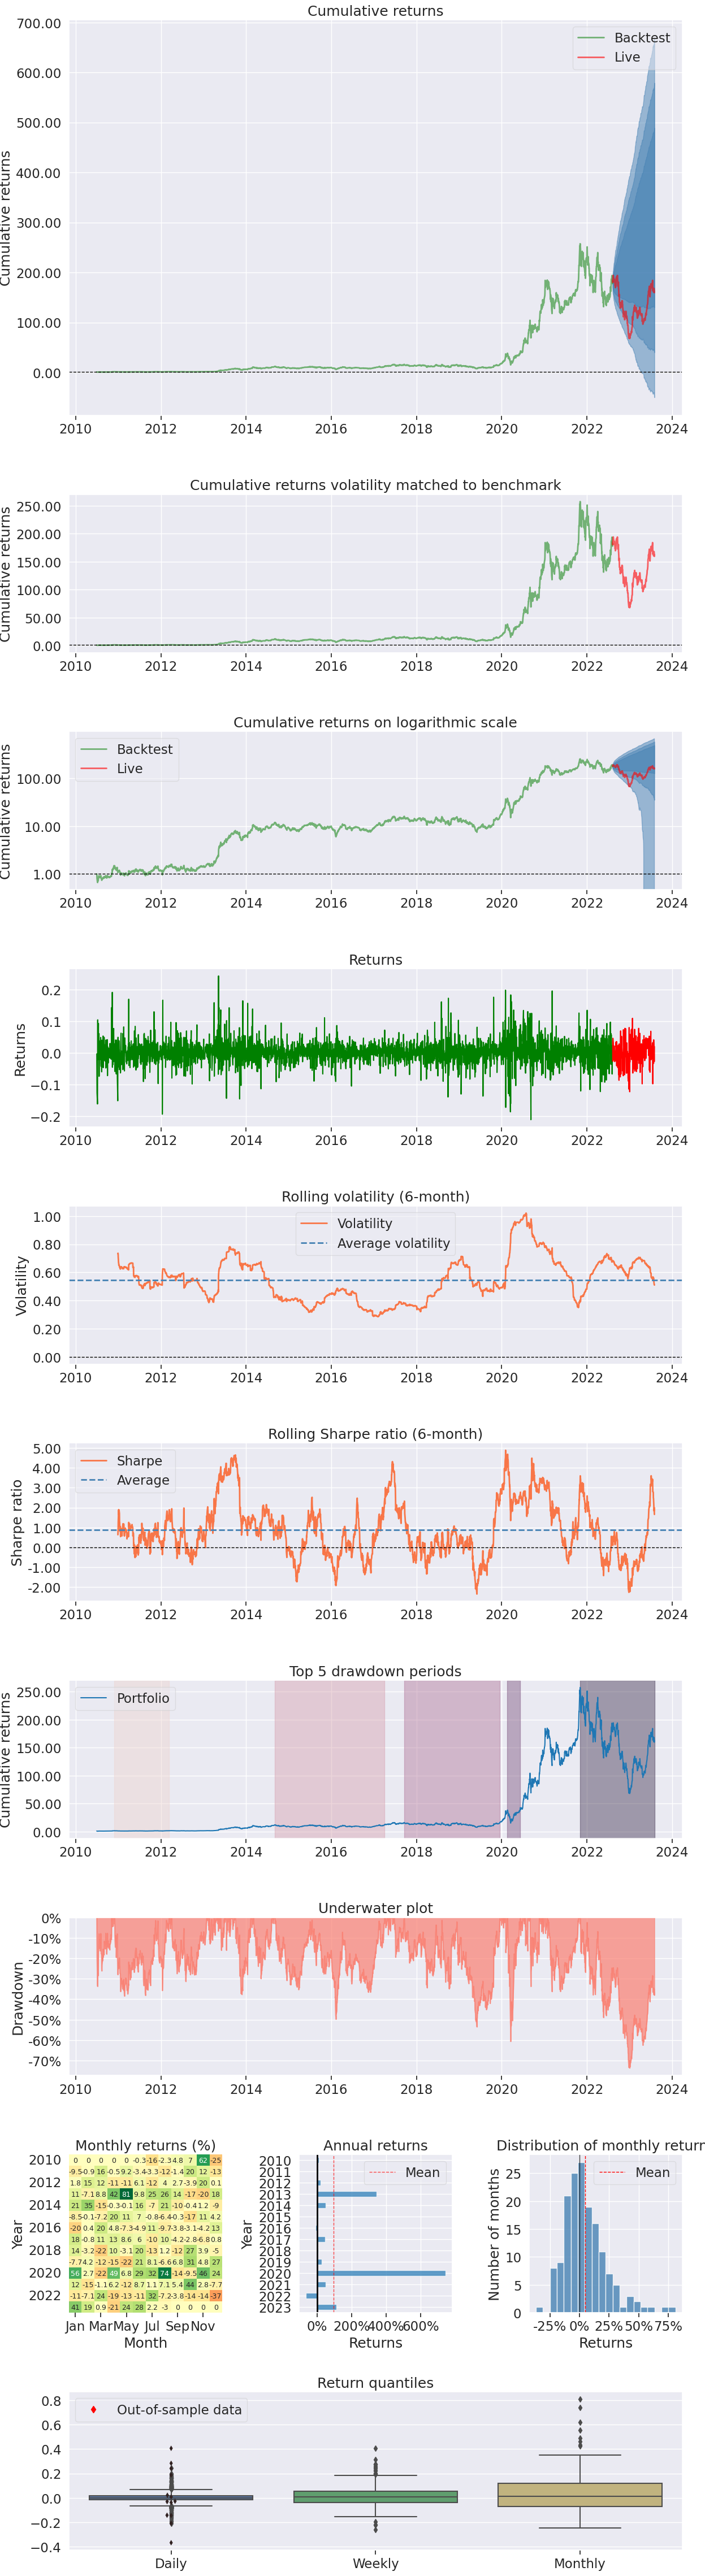

In [22]:
# Test out new Libraries Space

# Make sure you scroll all the way down

tesla_stock_history = pf.utils.get_symbol_rets('TSLA')
tesla_stock_history.head()

pf.create_returns_tear_sheet(tesla_stock_history, live_start_date='2022-08-10')

names = ['SPY', 'TSLA', 'LCID', 'F']
start_date = '2022-08-01'
end_date = '2023-08-01'

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2022-08-01'
end = '2023-08-01'

# Tickers of assets
assets = ['LCID', 'TSLA', 'F', 'META', 'RBLX', 'AAPL', 'MSFT',
          'GOOGL', 'NVDA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

# Calculating returns

Y = data[assets].iloc[-252:,:].pct_change().dropna()

display(Y.tail())

(CVXPY) Aug 07 01:09:17 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/_scs_direct.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib\n  Referenced from: <EA245032-41C7-30EA-BA1A-C55492696949> /Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/_scs_direct.cpython-310-darwin.so\n  Reason: tried: '/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/../../liblapack.3.dylib' (no such file), '/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/../../liblapack.3.dylib' (no such file), '/Users/alexisreyes/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/Users/alexisreyes/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)")
[*********************100%***********************]  9 of 9 

,AAPL,F,GOOGL,LCID,META,MSFT,NVDA,RBLX,TSLA
Date,,,,,,,,,
2023-07-25,0.4514%,-2.7221%,0.5595%,-4.6025%,0.9808%,1.7009%,2.3917%,0.2781%,-1.4049%
2023-07-26,0.4545%,0.6627%,5.7769%,4.8246%,1.3923%,-3.7638%,-0.4970%,0.7312%,-0.3506%
2023-07-27,-0.6581%,0.4389%,0.1006%,-3.9052%,4.4010%,-2.0872%,0.9857%,-5.1064%,-3.2684%
2023-07-28,1.3508%,-3.4232%,2.4575%,8.4180%,4.4176%,2.3131%,1.8519%,2.6906%,4.1962%
2023-07-31,0.3166%,-0.3771%,0.1056%,1.8742%,-2.1138%,-0.7241%,-0.0449%,0.8220%,0.3716%


In [24]:
# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data

data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

[*********************100%***********************]  14 of 14 completed


,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2022-08-02,-0.5478%,-0.8463%,-0.2761%,-0.6389%,-1.1463%
2022-08-03,0.2189%,1.2927%,1.3590%,1.1081%,1.1912%
2022-08-04,-1.1557%,0.2372%,-0.1324%,-0.0271%,-0.5938%
2022-08-05,0.3493%,-0.1714%,0.3398%,0.1759%,-0.1572%
2022-08-08,0.3765%,-0.0572%,0.4708%,0.2837%,0.2519%


In [25]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio with MINIMAL RISK:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,F,GOOGL,LCID,META,MSFT,NVDA,RBLX,TSLA
weights,51.9584%,19.8943%,3.4389%,0.0000%,0.0000%,24.7085%,0.0000%,0.0000%,0.0000%


,AAPL,F,GOOGL,LCID,META,MSFT,NVDA,RBLX,TSLA
0,51.9584%,19.8943%,3.4389%,0.0000%,0.0000%,24.7085%,0.0000%,0.0000%,0.0000%
1,54.7161%,13.4349%,0.0000%,0.0000%,4.9651%,25.5534%,1.3305%,0.0000%,0.0000%
2,54.0062%,11.8836%,0.0000%,0.0000%,6.9403%,22.8426%,4.3274%,0.0000%,0.0000%
3,53.3806%,10.4877%,0.0000%,0.0000%,8.7091%,20.4074%,7.0152%,0.0000%,0.0000%
4,52.7812%,9.2148%,0.0000%,0.0000%,10.3415%,18.1780%,9.4845%,0.0000%,0.0000%


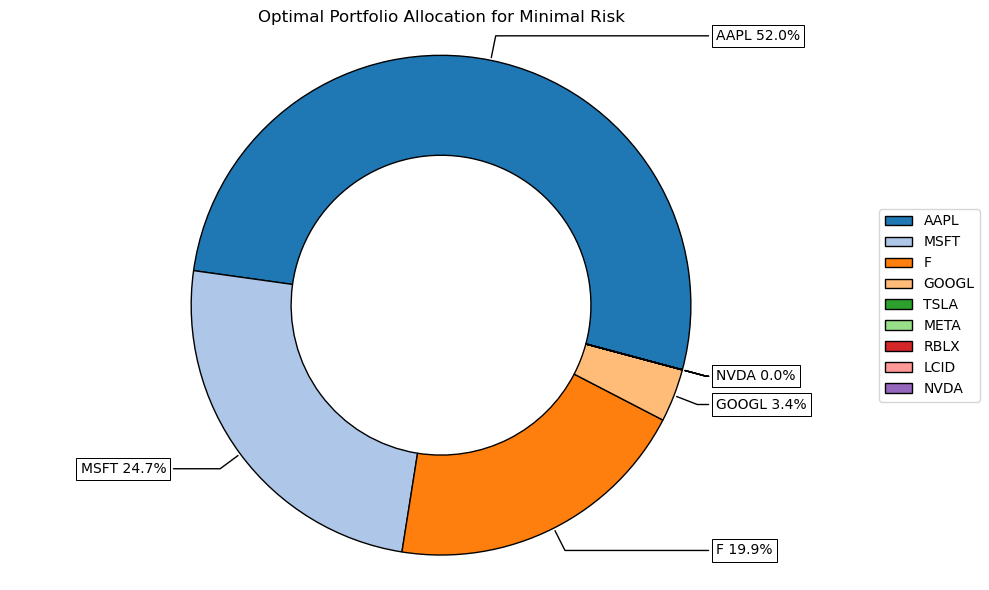

In [26]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Optimal Portfolio Allocation for Minimal Risk', others=.9, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

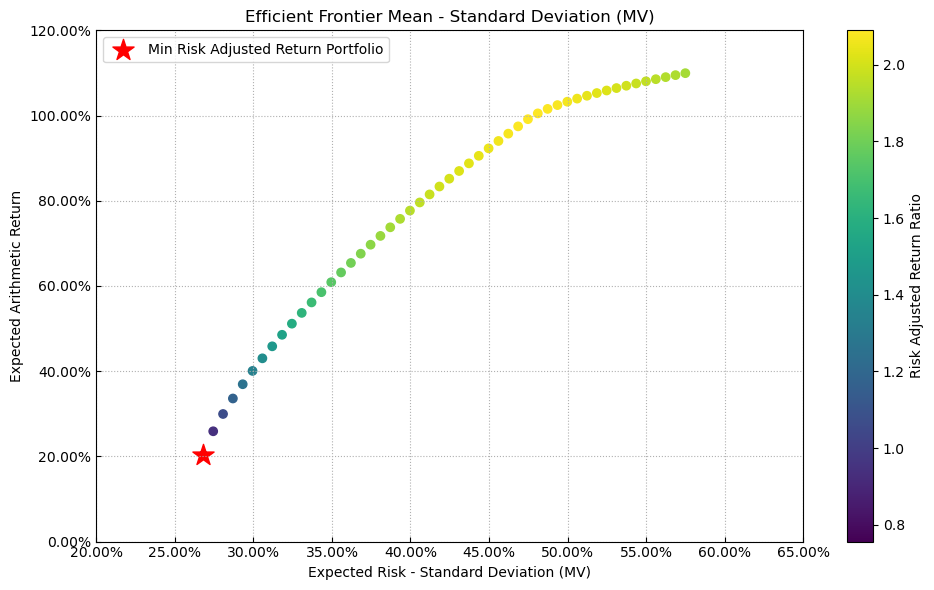

In [27]:
# Plotting the efficient frontier

label = 'Min Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [28]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [29]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AAPL,51.96%,63.50%,51.87%,59.33%,51.77%,42.41%,21.48%,0.00%,22.99%,67.50%,41.15%,64.88%,33.58%
F,19.89%,12.99%,18.01%,9.78%,16.74%,19.38%,23.93%,34.04%,16.97%,0.00%,1.28%,0.00%,8.53%
GOOGL,3.44%,6.25%,0.00%,5.96%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
LCID,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,3.30%,7.69%,0.00%,0.00%,0.00%,0.00%,0.00%
META,0.00%,0.00%,0.00%,4.20%,0.00%,3.17%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
MSFT,24.71%,17.27%,30.12%,20.74%,31.49%,35.04%,43.01%,32.48%,60.05%,11.98%,57.57%,24.80%,57.89%
NVDA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,20.52%,0.00%,10.32%,0.00%
RBLX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
TSLA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,8.28%,25.78%,0.00%,0.00%,0.00%,0.00%,0.00%


Start date: 2022-08-01
End date: 2023-08-07


,Backtest
,
Annual return,14.85%
Cumulative return,14.98%
Annual volatility,36.44 %
Winning day ratio,50.0%
Sharpe ratio,0.56
Calmar ratio,0.26
Information ratio,0.0000%
Stability,0.34
Max Drawdown,-39.16 %


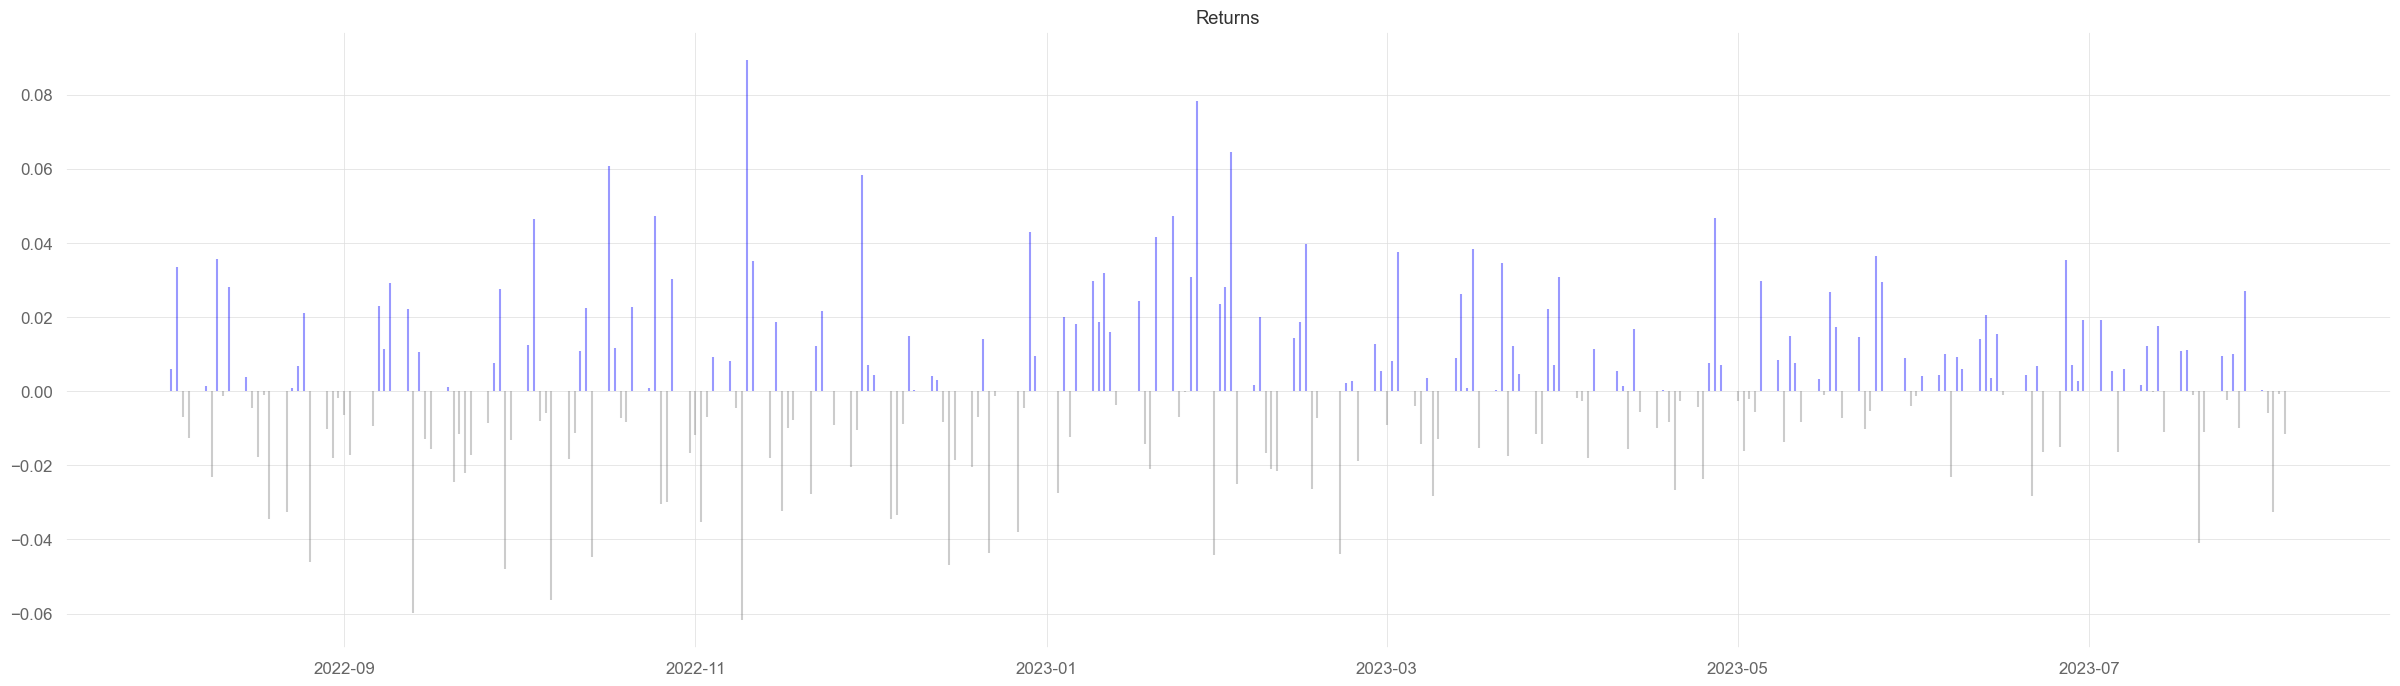

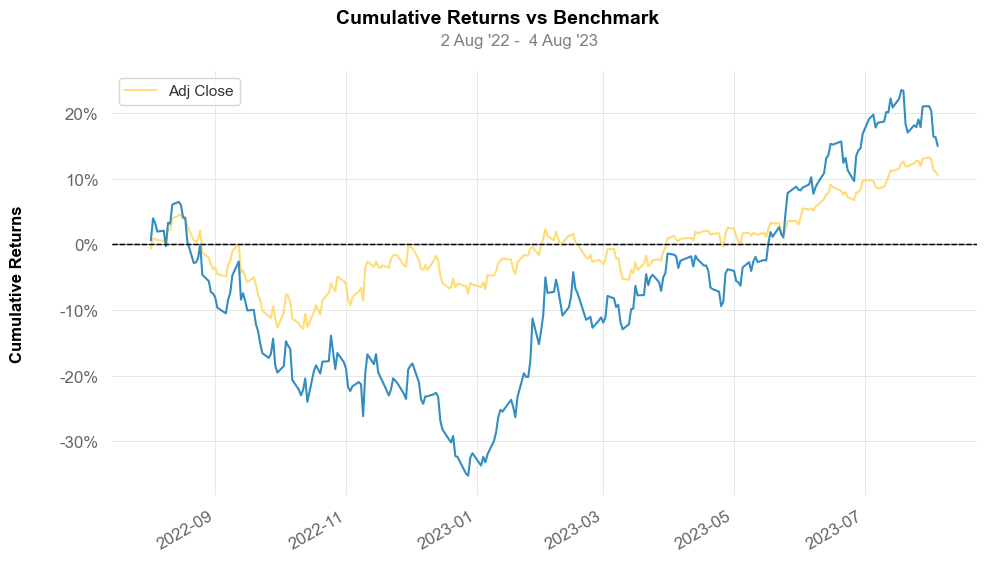

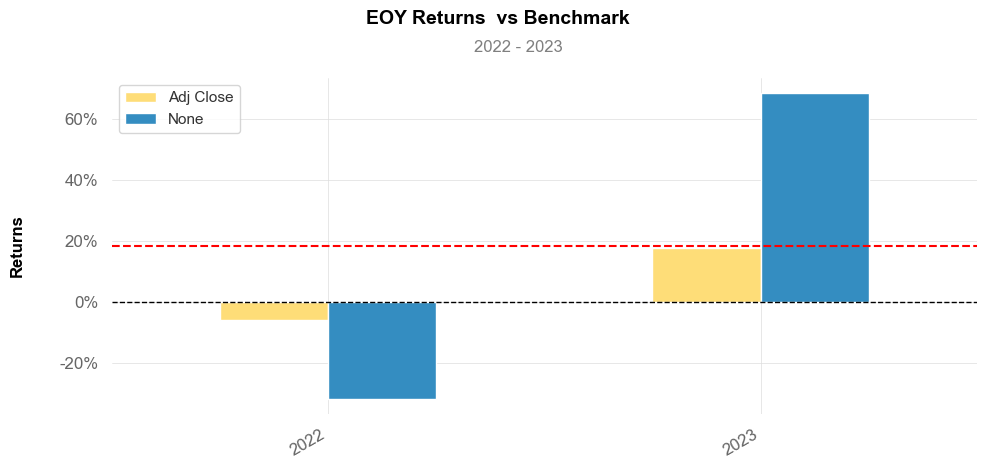

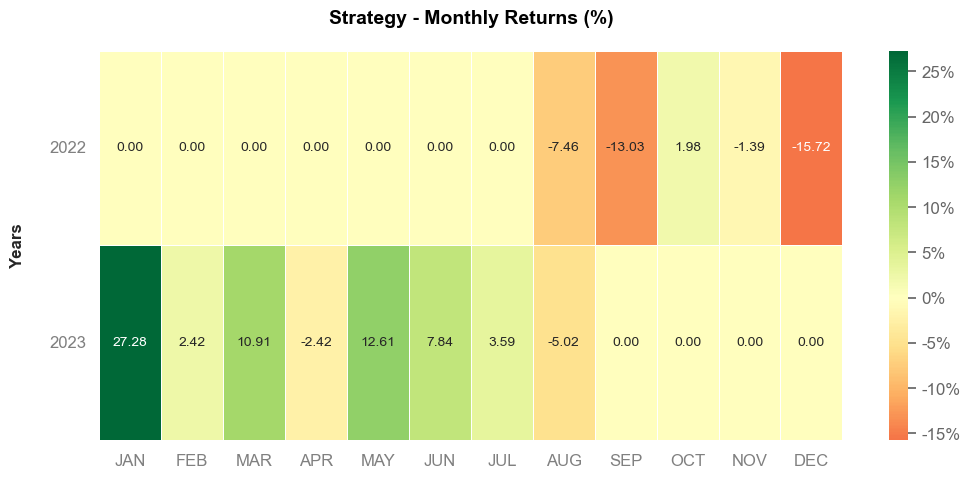

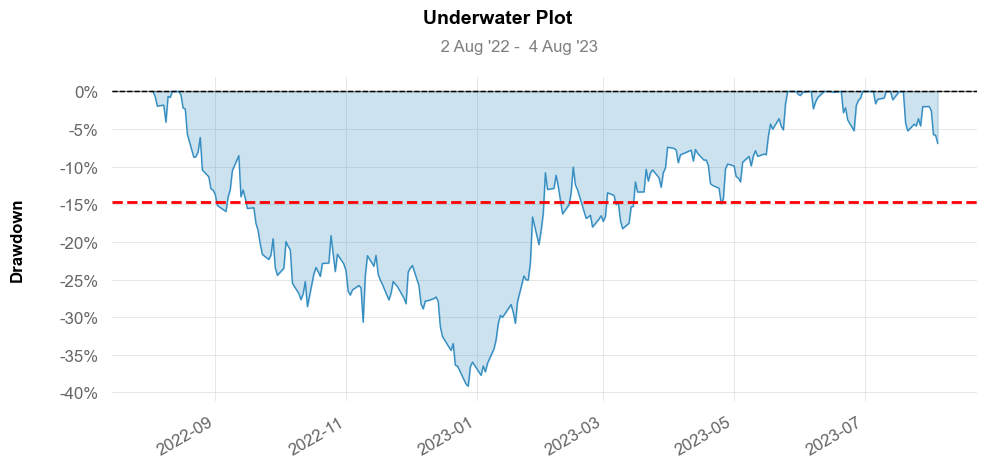

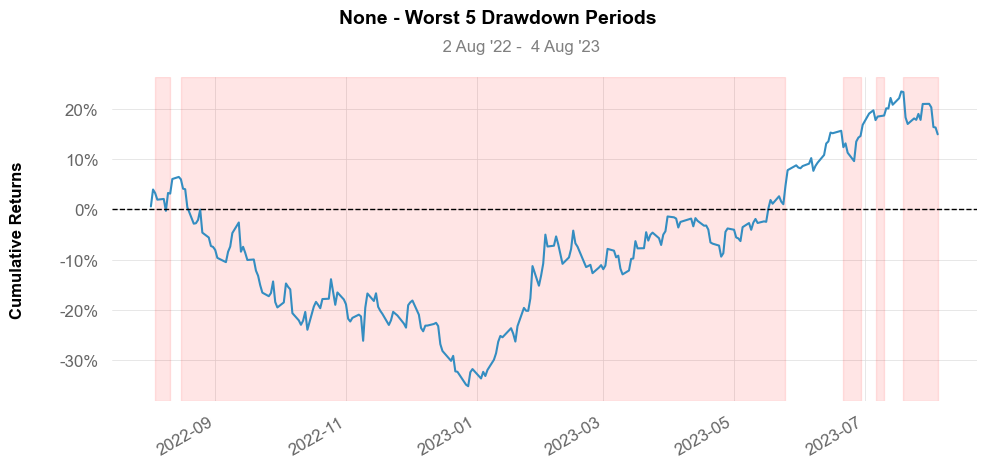

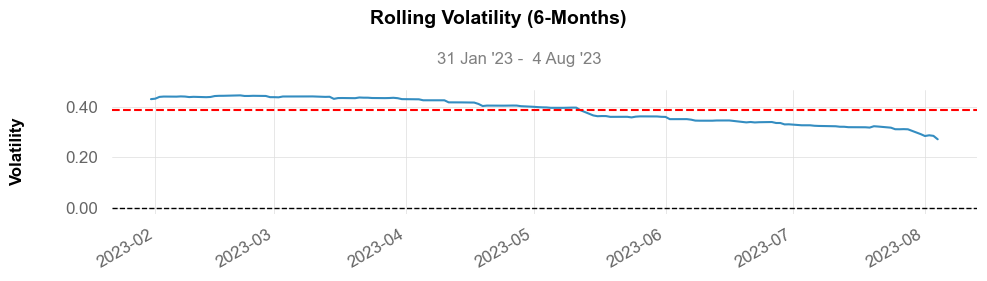

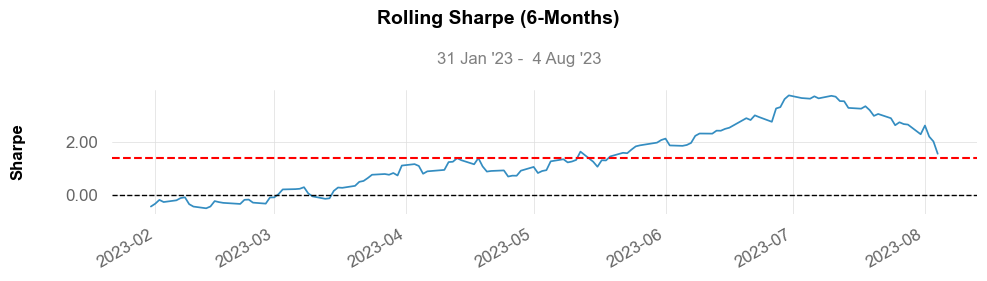

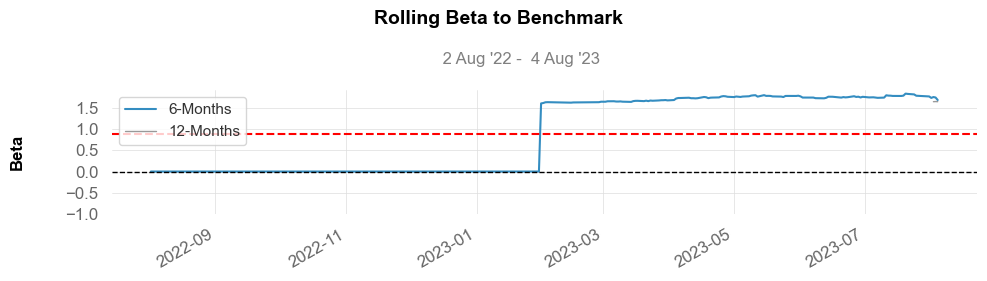

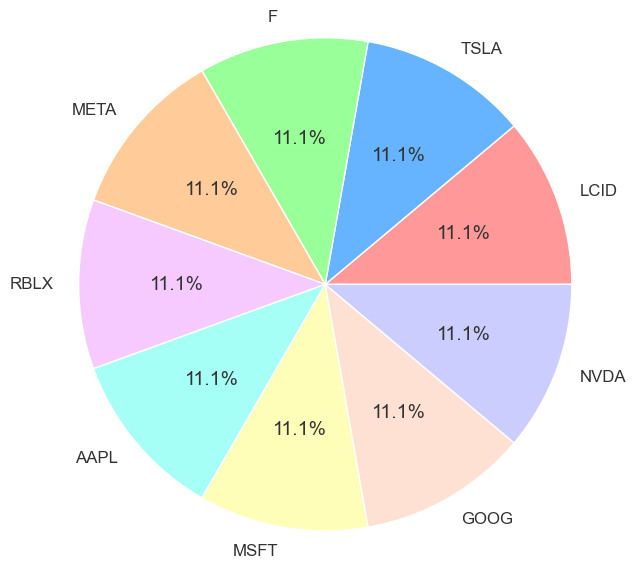

(None, None, None, None, None, None, None, None, None)

In [42]:
# Market Data from August 1st, 2022 until Present Day 

# Equally Distributed Portfolio of all Innovative Stocks and how a portfolio would perform

from empyrial import empyrial, Engine

portfolio = Engine(
    start_date = "2022-08-01", 
    portfolio = ["LCID", "TSLA", "F", "META", "RBLX", "AAPL", "MSFT", "GOOG", "NVDA"], 
    benchmark = ["SPY"]  # SPY is set by default
    #weights = #['0.5, 0.5'] or whatever amount you want to designate specific portfolio stock concentrated weights
)

empyrial(portfolio)

Start date: 2022-08-01
End date: 2023-08-07


,Backtest
,
Annual return,134.06%
Cumulative return,135.64%
Annual volatility,49.08 %
Winning day ratio,53.94%
Sharpe ratio,1.98
Calmar ratio,2.13
Information ratio,1.0000%
Stability,0.82
Max Drawdown,-37.66 %


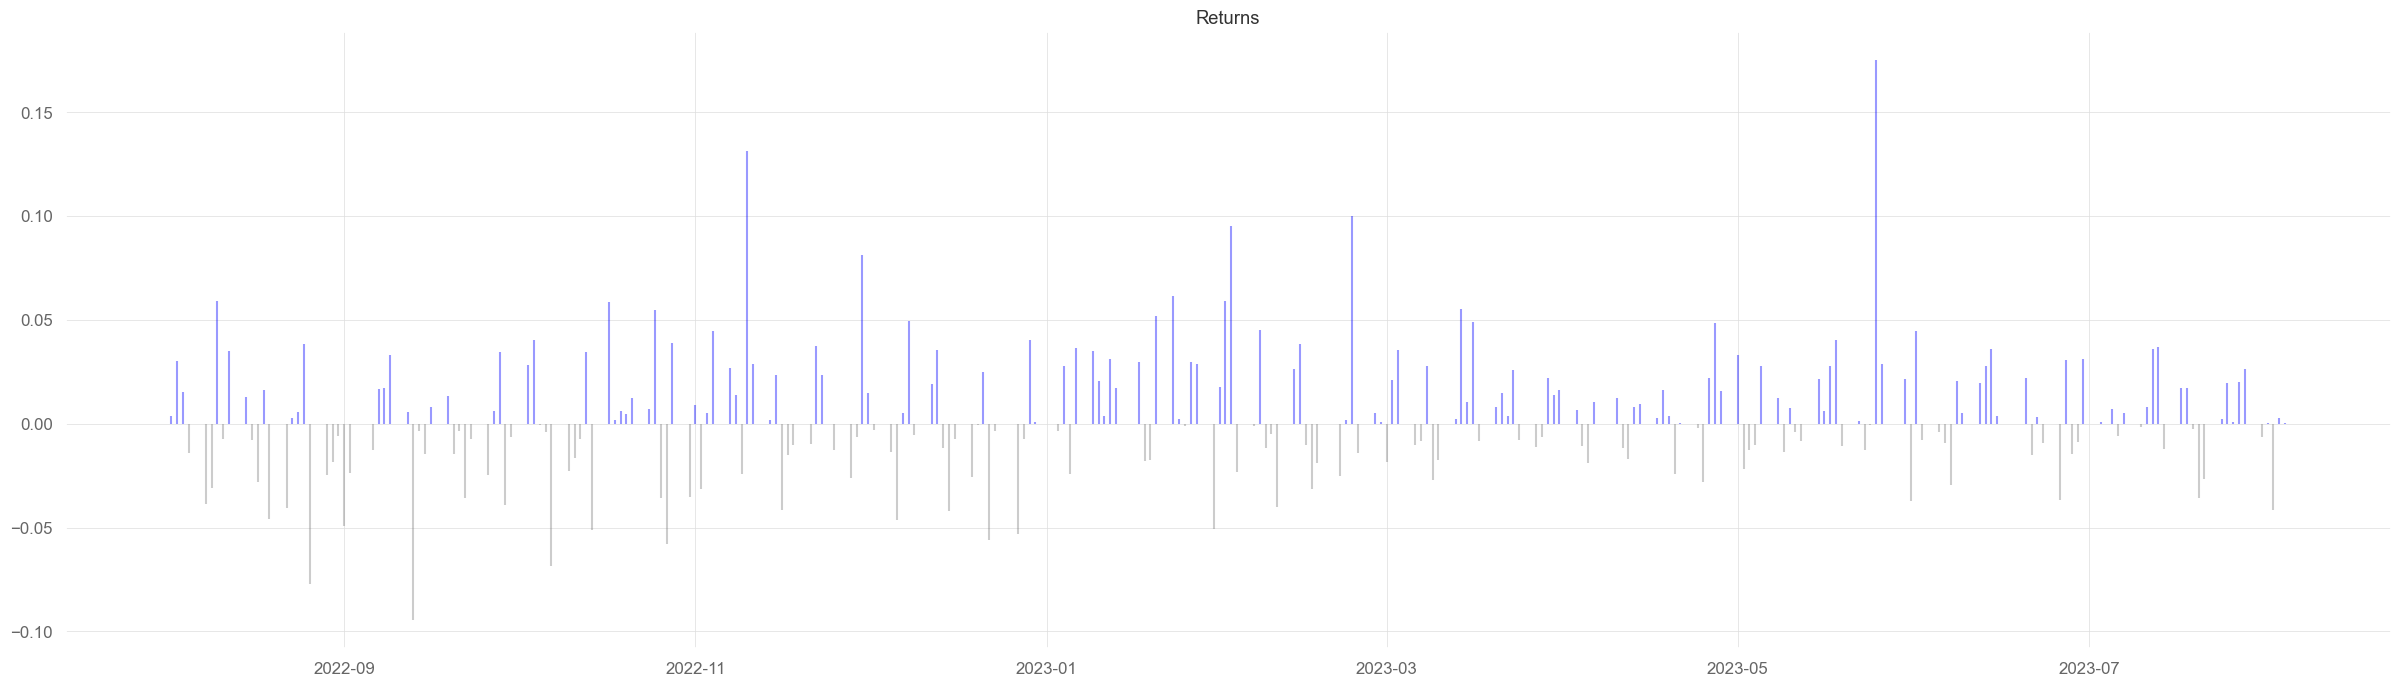

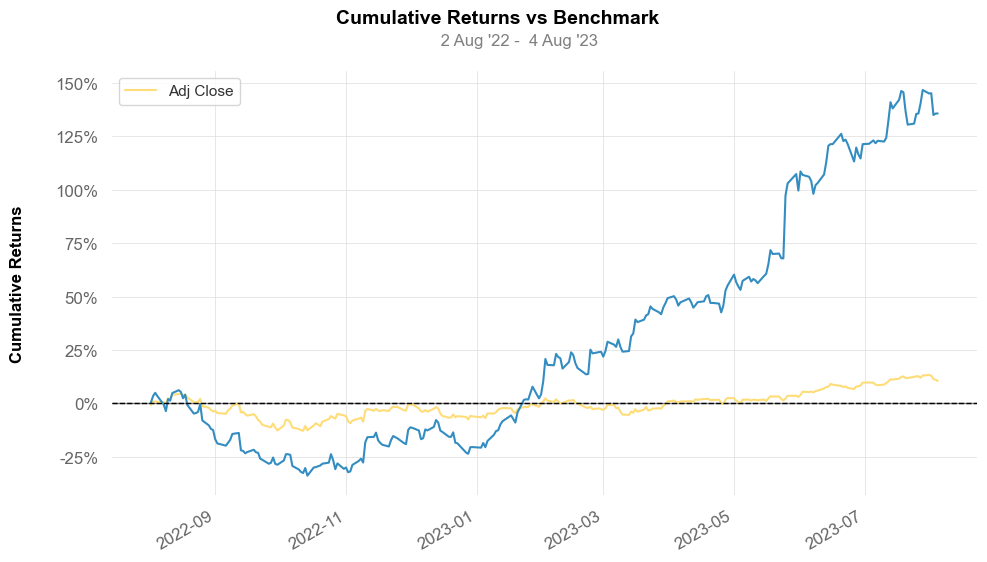

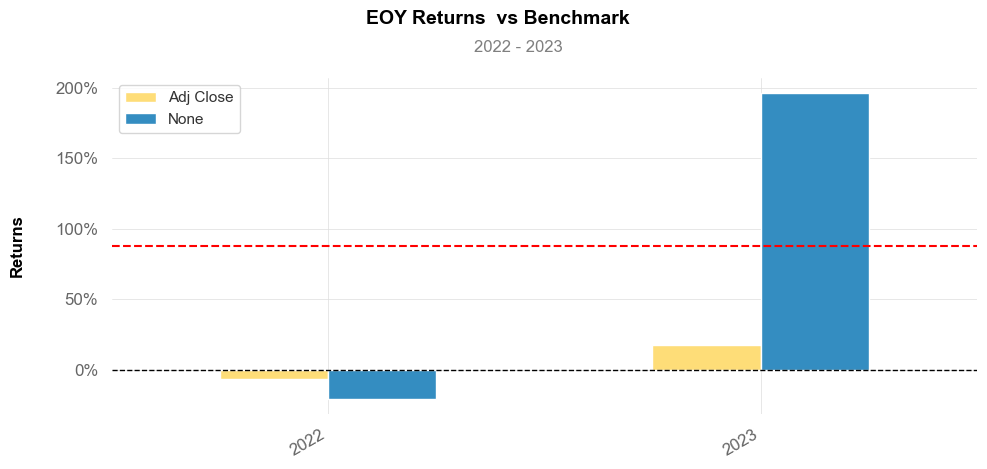

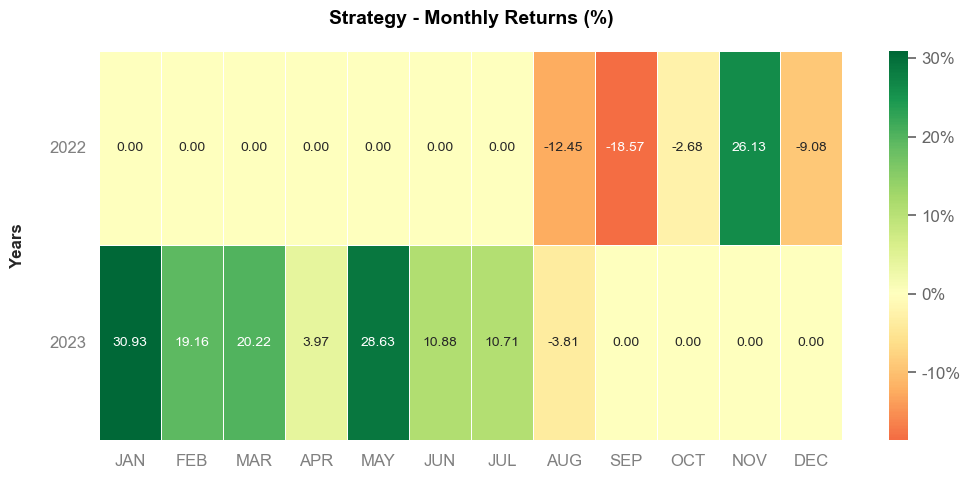

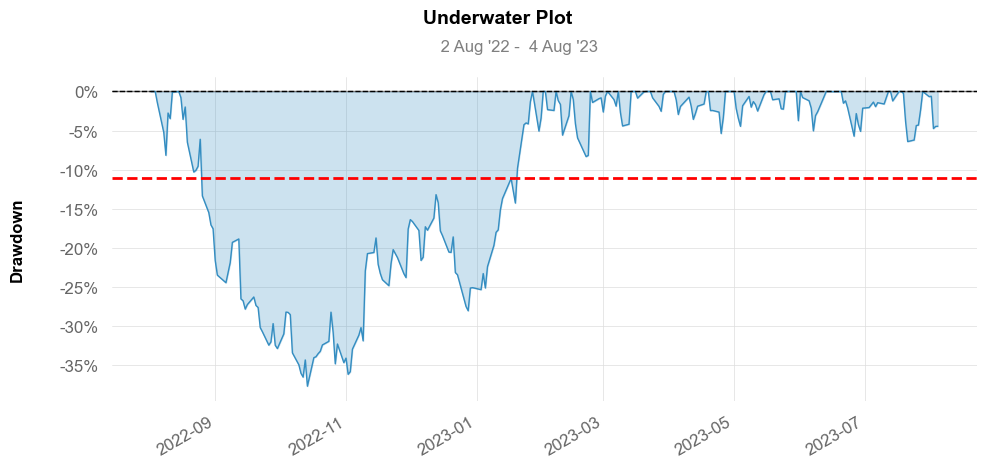

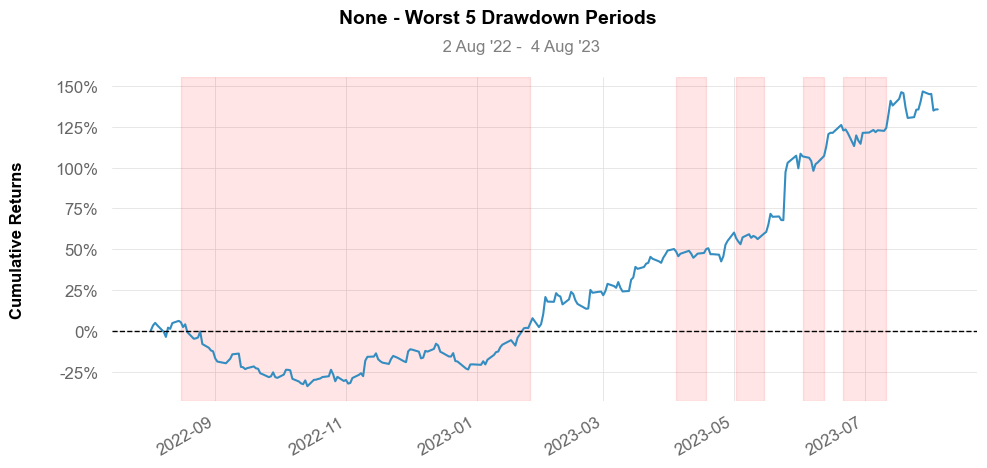

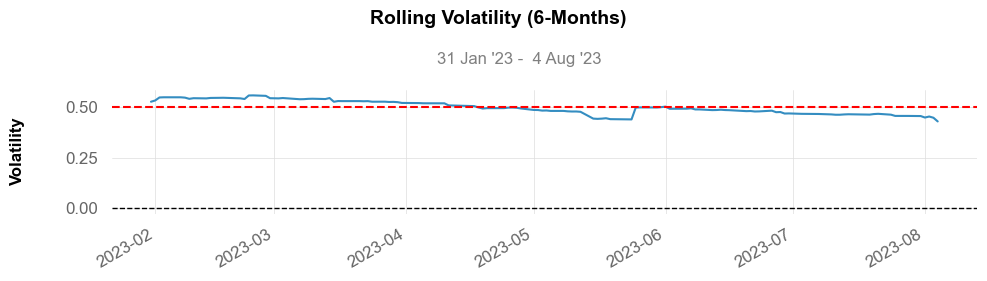

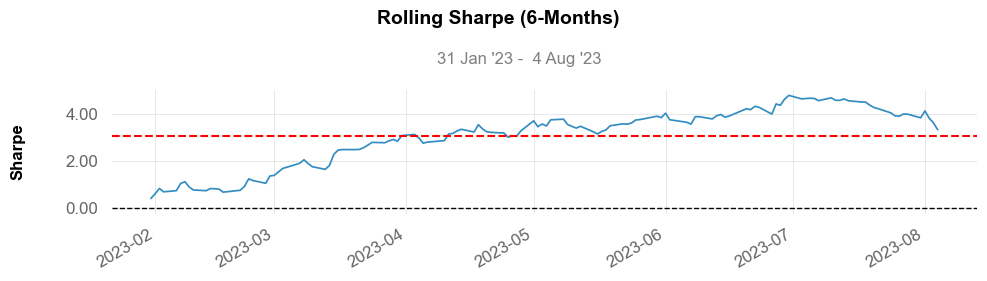

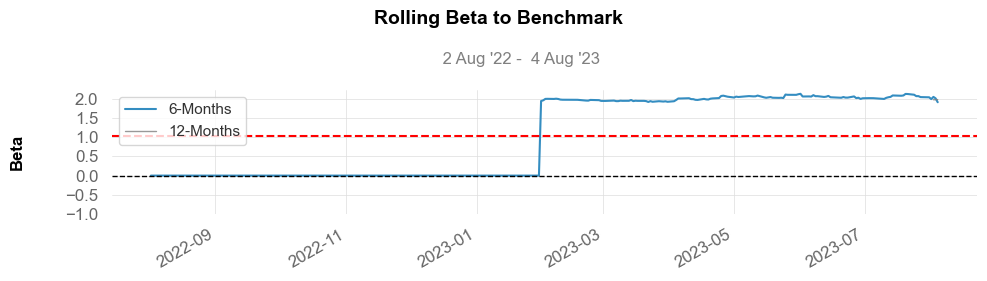

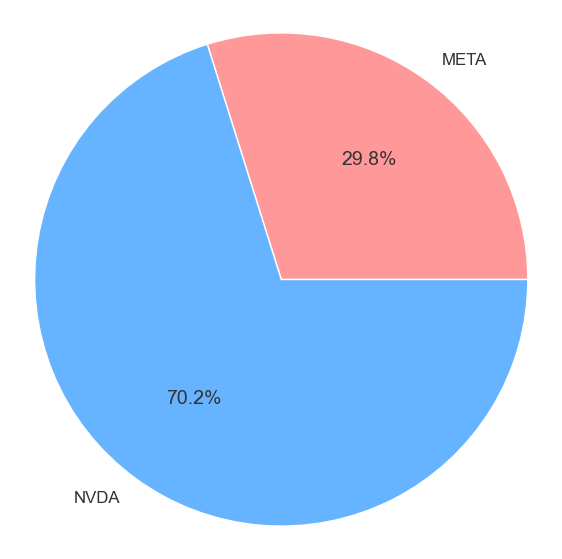

(None, None, None, None, None, None, None, None, None)

In [55]:
# Global Efficient

# The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. (Source: Investopedia)

from empyrial import empyrial, Engine

portfolio = Engine(
      start_date = "2022-08-01",
      benchmark = ["SPY"], #SPY is set by default
      portfolio = ["LCID", "TSLA", "F", "META", "RBLX", "AAPL", "MSFT", "GOOG", "NVDA"],
      optimizer = "EF" # This designates the Efficient Frontier analysis we're asking for
)

empyrial(portfolio)

In [ ]:
# Set up Sentimental Trading Dataconfiguration

# Configure Resource Folder for csv. downloaded from Google Trends and ingested into Innovest Sentiment Trading Engine

electric_file = Path('./Resources/electric_trend.csv')
meta_file = Path('./Resources/meta_trend.csv')
ai_file = Path('./Resources/ai_trend.csv')

electric_trend_csv = pd.read_csv(electric_file, index_col="Week", parse_dates=True, infer_datetime_format=True)
meta_trend_csv = pd.read_csv(meta_file, index_col="Week", parse_dates=True, infer_datetime_format=True)
ai_trend_csv = pd.read_csv(ai_file, index_col="Week", parse_dates=True, infer_datetime_format=True)

In [ ]:
# Concatenate & show all Innovative Sectors into One Big DataFrame

trends_df = pd.concat([electric_trend_csv, meta_trend_csv, ai_trend_csv], axis="columns", join="inner")

trends_df.tail()

In [ ]:
# Identify specific trends designated by 'Company Name' + 'Sector Name'

tsla_trend = trends_df['Tesla Electric Vehicle']
lcid_trend = trends_df['Lucid Electric Vehicle']
f_trend = trends_df['Ford Electric Vehicle']
meta_trend = trends_df['Facebook Metaverse']
rblx_trend = trends_df['Roblox Metaverse']
aapl_trend = trends_df['Apple Metaverse']
google_trend = trends_df['Google Artificial Intelligence']
msft_trend = trends_df['Microsoft Artificial Intelligence']
nvda_trend = trends_df['Nvidia Artificial Intelligence']

In [ ]:
# Combine and show Innovative sector specific trends

ev_trends = pd.concat([tsla_trend, lcid_trend, f_trend], axis = 'columns', join='inner')
meta_trends = pd.concat([meta_trend, rblx_trend, aapl_trend], axis = 'columns', join='inner')
ai_trends = pd.concat([google_trend, msft_trend, nvda_trend], axis = 'columns', join='inner')

meta_trends.head()

In [ ]:
# Configure functions for future Data Analysis & Data Manipulation

# Google Trends Standard Deviation

weekly_trends_std  = trends_df.std()

annualized_trends_std = weekly_trends_std * np.sqrt(52)

annualized_trends_std = annualized_trends_std.sort_values()

# Show the plot
trend_tbl = annualized_trends_std.hvplot.bar(
    xlabel='Company + Sector Name',
    ylabel='Annualized Trend Standard Deviation',
    title='Company most associated with their Innovation sector (least is best)'
)

In [ ]:
daily_std.iloc[0:3]

In [ ]:
# Which Portfolio has most Volatility 

volatility.hvplot.bar(ylabel='Standard Deviation', xlabel='Stock Ticker Symbol', title='Stock Volatility')

In [ ]:
# Data Analysis Continued

print(f'Below, we can see which companies, accompanied by their sector, have what we internally call a "hype guage".')
print('')
print(f'This proprietary data indicator determines how likely/unlikely these companies are to remain "relavant" in their breakthrough sector:')
print('')

display(weekly_trends_std)
                
print('')
print(f'Here is each disruptors ability to remain relevant (on average):')
print('')
display(ev_trends.hvplot(xlabel='Week #', ylabel='Google Trend Score', title='Google Trends in last 12 Months for Electric Vehicle Companies'))
print('')
print(f'Based on Google Trends Data, here is each Electric Vehicle company ability to stay relevant in innovative space:')
print('')
print(ev_trends.mean())

In [ ]:
# Dataframe Initialization for specific sectors and pricepoints for future Monte Carlo simulations vs. Sentiment Trading Analysis correlation

# `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

# Configure data to plot out initial investment and cumulative returns on initial investment

initial_investment = 10000

cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.hvplot(xlabel='Last Year', ylabel='Portfolio Return/Valuation in $USD', title='How much money would you have, if you invested $10k last year ago today?')

In [ ]:
# More Extra Visualizations

combined_dly_rtn.hvplot()

# Bar Plots that will be used in future Overlay and Data Visualization Manipulation

tsla_trend_plot = tsla_trend.hvplot(kind='bar')
lcid_trend_plot = lcid_trend.hvplot(kind='bar')
f_trend_plot = f_trend.hvplot(kind='bar')
meta_trend_plot = meta_trend.hvplot(kind='bar')
rblx_trend_plot = rblx_trend.hvplot(kind='bar')
aapl_trend_plot = aapl_trend.hvplot(kind='bar')
google_trend_plot = google_trend.hvplot(kind='bar')
msft_trend_plot = msft_trend.hvplot(kind='bar')
nvda_trend_plot = nvda_trend.hvplot(kind='bar')

In [ ]:
daily_std

In [ ]:
daily_std.reset_index()

In [58]:
# Sandbox for Experimental Data Manipulation for Alexis

print(f'What is up guys?!')

What is up guys?!


In [ ]:
# Sandbox for Experimental Data Manipulation for Bryant

In [ ]:
# Sandbox for Experimental Data Manipulation for Stephan
